# *Exploring the Influence of Weather on TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂Exploratory Data Analysis

### Notebook Content

- Introduction
- Data Loading
- Baseline Model
- Confusion Matrix
- Summary
-------

### 🚂 Introduction 


In this notebook, we will run a baseline model to test our hypothesis: is there a relationship between weather conditions and TTC streetcar delays?

----
### 🚂 Data Loading

In [1]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing modelling library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading merged datasest
df=pd.read_csv('data/Capstone_clean_model.csv',index_col =0)
df

,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Day,Line,Min_Delay,Year,Month,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,4,501,1,2021,1,...,0,0,0,0,0,1,0,0,0,0
2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,4,504,1,2021,1,...,0,0,0,0,0,1,0,0,0,0
2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,4,504,1,2021,1,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,4,504,1,2021,1,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 05:00:00,0.4,0.0,NaN,NaN,16.1,4,506,1,2021,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 22:00:00,16.6,0.0,NaN,NaN,16.1,5,511,2,2023,9,...,0,0,0,0,0,0,0,0,0,0
2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,5,505,1,2023,9,...,0,0,0,0,0,0,0,0,1,0
2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,5,513,1,2023,9,...,0,0,0,0,0,1,0,0,0,0


In [5]:
#Checking columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41941 entries, 2021-01-01 03:00:00 to 2023-09-30 01:00:00
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        41941 non-null  float64
 1   Precipitation                      41941 non-null  float64
 2   Summer_PT                          7185 non-null   float64
 3   Winter_PT                          7094 non-null   float64
 4   Visibility                         41941 non-null  float64
 5   Day                                41941 non-null  int64  
 6   Line                               41941 non-null  int64  
 7   Min_Delay                          41941 non-null  int64  
 8   Year                               41941 non-null  int64  
 9   Month                              41941 non-null  int64  
 10  Date                               41941 non-null  int64  
 11  Hour                       

In [6]:
#looks good. everything is in numerical.
#drop as there are null values here. 
drops = ['Summer_PT','Winter_PT']

df=df.drop(drops, axis =1)

In [7]:
#checking shape
print(f'Here, we have {df.shape[0]} rows and {df.shape[1]} columns.')

Here, we have 41941 rows and 38 columns.


In [8]:
#checking
df.head(3)

,Temperature,Precipitation,Visibility,Day,Line,Min_Delay,Year,Month,Date,Hour,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 03:00:00,-2.0,0.0,16.1,4,501,1,2021,1,1,3,...,0,0,0,0,0,1,0,0,0,0
2021-01-01 03:00:00,-2.0,0.0,16.1,4,504,1,2021,1,1,3,...,0,0,0,0,0,1,0,0,0,0
2021-01-01 04:00:00,-1.4,0.0,16.1,4,504,1,2021,1,1,4,...,0,0,0,0,0,0,0,0,0,0


Let's look into the correlation between all variables. 

In [9]:
df.corr()

,Temperature,Precipitation,Visibility,Day,Line,Min_Delay,Year,Month,Date,Hour,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
Temperature,1.000000,0.005947,0.125039,-0.009827,0.019752,-0.006138,0.016915,0.420866,0.000423,0.085323,...,-0.019360,-0.014969,0.006661,0.021099,-0.011559,0.021334,-0.002544,-0.001133,-0.038644,-0.017169
Precipitation,0.005947,1.000000,-0.297748,-0.021820,-0.001875,-0.000024,0.013921,-0.004093,0.016265,-0.009713,...,-0.004496,-0.001521,-0.002714,-0.002557,0.016066,-0.022213,0.010771,-0.004513,-0.001712,0.000519
Visibility,0.125039,-0.297748,1.000000,0.017412,0.005537,-0.010888,-0.029776,0.037468,-0.024336,0.049439,...,-0.002951,0.007515,-0.012288,-0.005921,-0.009545,0.012260,-0.004771,0.000062,0.004306,-0.001088
Day,-0.009827,-0.021820,0.017412,1.000000,-0.007051,0.000933,-0.003720,-0.010638,-0.021774,0.015016,...,0.006476,0.004628,0.008229,0.000175,-0.006357,-0.022523,-0.003783,-0.008797,0.003691,-0.017100
Line,0.019752,-0.001875,0.005537,-0.007051,1.000000,-0.034891,0.003337,0.004506,0.000500,0.180770,...,0.005477,0.005719,0.001431,0.001490,0.011252,0.056011,0.012680,0.007486,-0.043022,-0.022830
Min_Delay,-0.006138,-0.000024,-0.010888,0.000933,-0.034891,1.000000,-0.029882,0.006156,0.014010,0.040428,...,-0.002706,-0.002303,-0.000969,-0.001067,-0.007249,-0.030612,0.075067,-0.014852,-0.098926,-0.006916
Year,0.016915,0.013921,-0.029776,-0.003720,0.003337,-0.029882,1.000000,-0.223951,-0.027359,-0.015383,...,-0.060459,0.024910,-0.021643,-0.023851,0.019680,-0.160525,-0.007180,0.015078,0.040831,0.001096
Month,0.420866,-0.004093,0.037468,-0.010638,0.004506,0.006156,-0.223951,1.000000,0.040835,0.034451,...,-0.034960,-0.017169,-0.003314,0.007861,-0.023091,0.055578,-0.015447,0.016940,-0.023364,0.003200
Date,0.000423,0.016265,-0.024336,-0.021774,0.000500,0.014010,-0.027359,0.040835,1.000000,-0.003527,...,-0.008756,0.004082,-0.002687,-0.008010,0.001526,0.000091,0.005285,0.007987,-0.007068,0.005908
Hour,0.085323,-0.009713,0.049439,0.015016,0.180770,0.040428,-0.015383,0.034451,-0.003527,1.000000,...,-0.017424,-0.014050,-0.007740,-0.016826,-0.003542,0.040481,-0.020055,-0.019564,-0.037661,0.002689


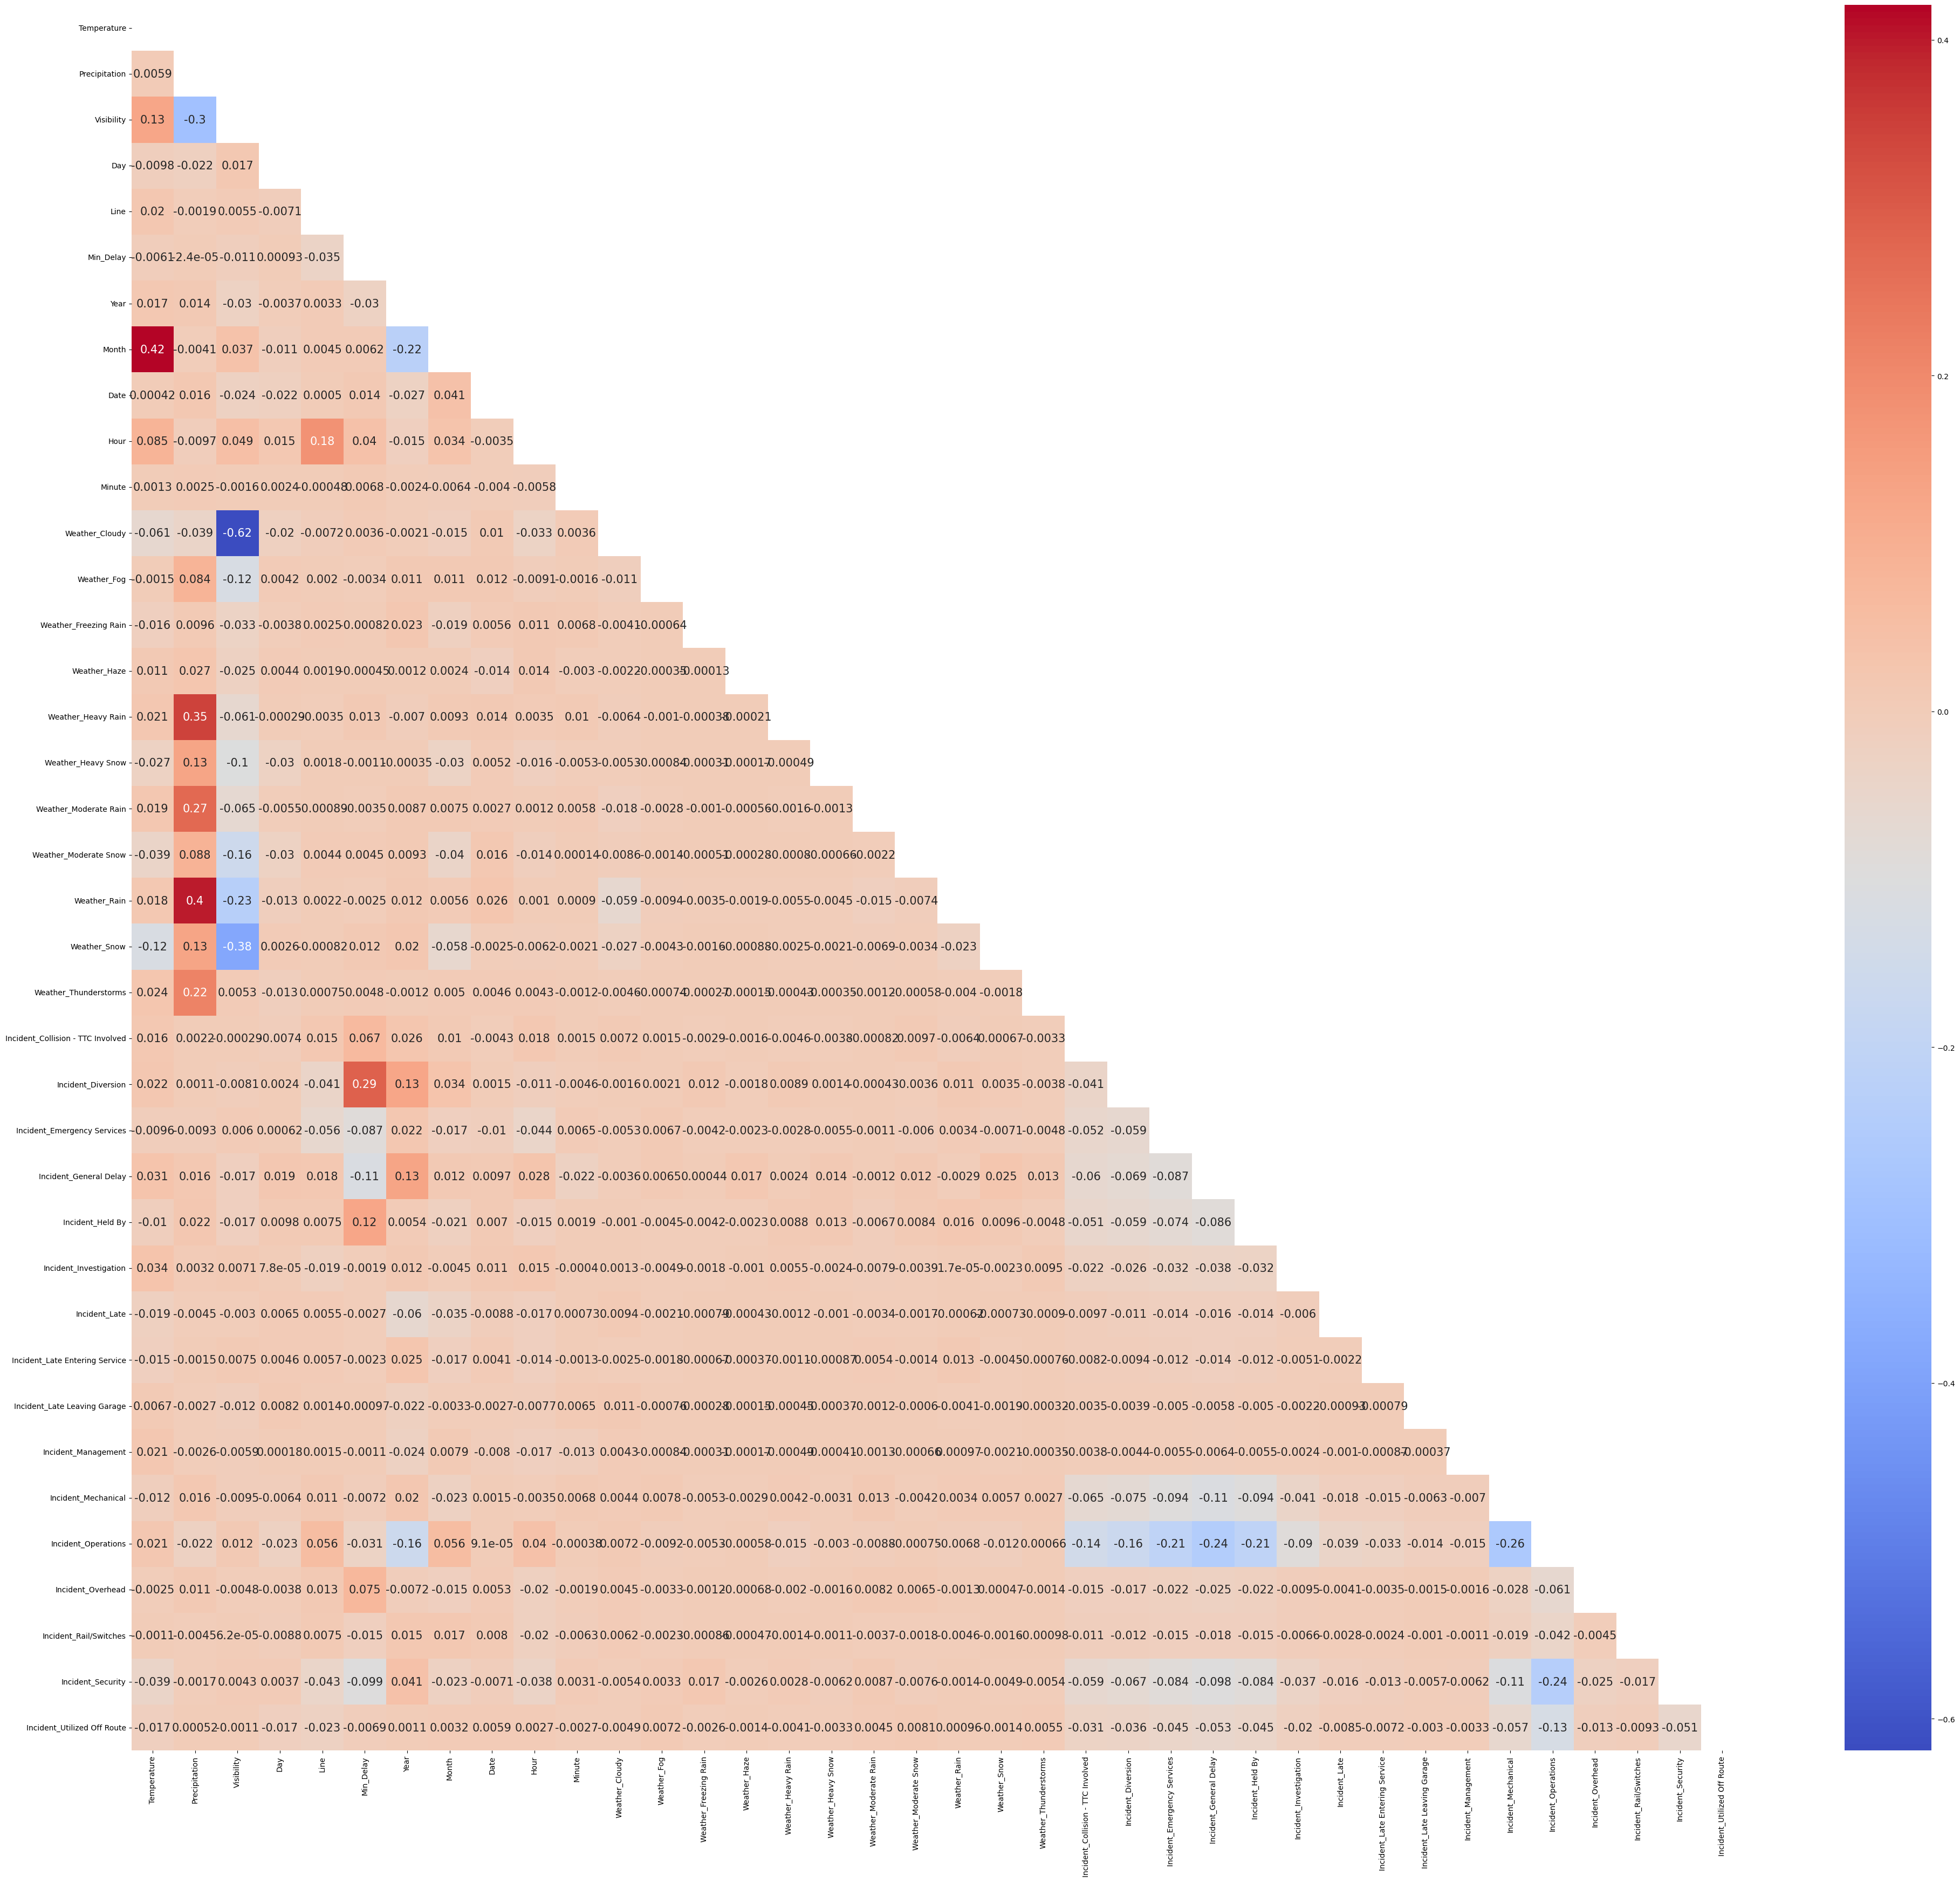

In [10]:
#Visualizing the correlations
plt.figure(figsize=(40,35))

matrix=np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm', annot_kws={"size": 15})

plt.tight_layout()

Correlations have been identified between each streetcar and the weather dataset, but not between streetcars and weather as a whole.

---
### 🚂Baseline Model

In [11]:
#Defininig variables
#70% train size, 30% test size

X=df.drop('Min_Delay', axis=1)
y=df['Min_Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=1, stratify=y)

In [12]:
#checking the shape 
print(f'This is X_train shape: {X_train.shape}')
print(f'This is y_train shape: {y_train.shape}')

This is X_train shape: (29358, 37)
This is y_train shape: (29358,)


In [13]:
#checking the shape 
print(f'This is X_test shape: {X_test.shape}')
print(f'This is y_test shape: {y_test.shape}')

This is X_test shape: (12583, 37)
This is y_test shape: (12583,)


In [14]:
#4 class target variable
y.value_counts().sort_index()

0     2893
1    36319
2     1523
3     1206
Name: Min_Delay, dtype: int64

In [18]:
#Instantiate the model
train_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
test_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#Fit the model
train_model.fit(X_train, y_train)
test_model.fit(X_test, y_test)

#Score the model
train_baseline = train_model.score(X_train, y_train)
test_baseline = test_model.score(X_test, y_test)

# Training and test score
print(f"Train score: {train_baseline}")
print(f"Test score: {test_baseline}")

Train score: 0.865999046256557
Test score: 0.865930223317174


The prediction is very low. We should look fore better parameters and models that would peform better in the next notebook.

---
### 🚂Confusion Matrix

,Predicted-On Time,Predicted-Moderate Delay,Predicted Significant Delay,Predicted-Severe Delay
True- On Time,0,868,0,0
True-Moderate Delay,0,10896,0,0
True-Significant Delay,0,457,0,0
True-Severe Delay,0,362,0,0


None


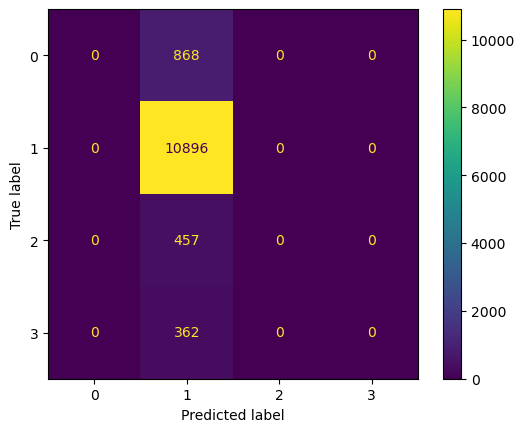

In [19]:
# Get class predictions
y_pred = train_model.predict(X_test)

# Generate confusion matrix
df_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
df = pd.DataFrame(
    df_matrix, 
    columns = ["Predicted-On Time", "Predicted-Moderate Delay", "Predicted Significant Delay", "Predicted-Severe Delay"],
    index = ["True- On Time", "True-Moderate Delay", "True-Significant Delay", "True-Severe Delay"]
)

print(display(df))

# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(train_model, X_test, y_test);

---- 
### 🚂Summary

Our regression model is not performing very well. In the next notebook, we will dive into identifying the most effective parameters for the decision tree model. Also, we will create a pipeline that optimizes the prediction of streetcar delays, for the highest accuracy possible.